In [1]:
import uproot
import awkward as ak
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
import numpy as np

REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))

from data_processing.jets.common_utils import calculate_cartesian_coordinates, intersection_fixed_z
from data_processing.jets.track_metadata import fixed_r, fixed_z

GEO_FILE_LOC = "/fast_scratch_1/atlas/pflow/rho_small.root"

# likely root awkward arr:
awk_file = "/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_3/AwkwardArrs/deltaR=0.2/val/JZ4/user.mswiatlo.39955735._000005.mltree.root_chunk_0_val.parquet"
likely_root_file = "/fast_scratch_1/atlas/pflow/20240614/user.mswiatlo.801169.Py8EG_A14NNPDF23LO_jj_JZ4.recon.ESD.e8514_e8528_s4185_s4114_r14977_2024.06.14.1_mltree.root/user.mswiatlo.39955735._000005.mltree.root"

In [2]:
root_file = uproot.open(likely_root_file)
geo_file = uproot.open(GEO_FILE_LOC)
"""truthPartPdgId
trackTruthParticleIndex"""
root_file['EventTree;1']['trackTruthParticleIndex'].array()[1][-1] # -1
root_file['EventTree;1']['truthPartPdgId'].array()[1][-1] # 22
'trackEta_EMB1',
root_file['EventTree;1']['trackEta_EMB1'].array()[1][-1] # 0.004631927
root_file['EventTree;1']['trackPt'].array()[1][-1] # 174.65944
root_file['EventTree;1']['cluster_cell_hitsTruthIndex'].array()[0][0][0][0]

1159

In [11]:
root_file['EventTree;1'].keys()

['runNumber',
 'eventNumber',
 'lumiBlock',
 'coreFlags',
 'mcEventNumber',
 'mcChannelNumber',
 'mcEventWeight',
 'nTruthPart',
 'truthPartBarcode',
 'truthPartPdgId',
 'G4PreCalo_n_EM',
 'G4PreCalo_E_EM',
 'G4PreCalo_n_Had',
 'G4PreCalo_E_Had',
 'truthVertexX',
 'truthVertexY',
 'truthVertexZ',
 'truthPartStatus',
 'truthPartPt',
 'truthPartE',
 'truthPartMass',
 'truthPartEta',
 'truthPartPhi',
 'nTrack',
 'trackPt',
 'trackP',
 'trackMass',
 'trackEta',
 'trackPhi',
 'trackTruthParticleIndex',
 'trackVisibleCalHitCaloEnergy',
 'trackFullCalHitCaloEnergy',
 'trackSubtractedCaloEnergy',
 'trackNumberOfPixelHits',
 'trackNumberOfSCTHits',
 'trackNumberOfPixelDeadSensors',
 'trackNumberOfSCTDeadSensors',
 'trackNumberOfPixelSharedHits',
 'trackNumberOfSCTSharedHits',
 'trackNumberOfPixelHoles',
 'trackNumberOfSCTHoles',
 'trackNumberOfInnermostPixelLayerHits',
 'trackNumberOfNextToInnermostPixelLayerHits',
 'trackExpectInnermostPixelLayerHit',
 'trackExpectNextToInnermostPixelLayerHit'

In [18]:
track_truth_particle_index = root_file['EventTree;1']['trackTruthParticleIndex'].array()
truth_part_pdg_id = root_file['EventTree;1']['truthPartPdgId'].array()
track_pt_l = root_file['EventTree;1']['trackPt'].array()

# Prepare a list to store the PDG IDs with index -1
pdg_ids_with_index_minus_one = []
pt_with_index_minus_one = []
all_pts = []

# Iterate over all events
for track_index, pdg_id_array, track_pt in zip(track_truth_particle_index, truth_part_pdg_id, track_pt_l):
    pdg_ids_with_index_minus_one.extend(list(pdg_id_array[track_index == -1]))
    pt_with_index_minus_one.extend(list(track_pt[track_index == -1]))
    all_pts.extend(list(track_pt))

    

In [7]:
print(pt_with_index_minus_one)

[0.9888509, 0.75377125, 1.5689219, 8.66675, 1.613009, 2.1779096, 174.65944, 7.991087, 2.6707127, 10.166558, 8.448657, 10.560372, 1.0565494, 1.1467533, 0.8680699, 1.6638787, 0.7195362, 0.6033722, 1.2142159, 0.96995574, 0.7742601, 1.011487, 6.356862, 3.8581114, 0.5579869, 0.9177609, 0.8825934, 0.5463923, 1.1117159, 0.59253937, 2.6345015, 0.5853359, 1.235567, 0.79404235, 1.2697619, 0.5236185, 0.9413014, 8.197454, 2.6413867, 2.7728684, 1.2566531, 1.220792, 0.70852715, 1.2936277, 0.5265972, 0.6846242, 0.75584096, 1.3564322, 1.2507267, 1.131886, 0.69417924, 0.7971653, 1.0819521, 1.504124, 0.51747745, 0.93731254, 0.5503372, 1.2378275, 0.557782, 0.7342594, 2.2188044, 1.2860196, 0.5926334, 1.0345464, 1.0903975, 0.94078517, 4.8403897, 0.5360689, 1.0832998, 2.4598265, 0.63892615, 2.399096, 0.5426358, 14.546655, 6.6397934, 3.3930843, 0.6696277, 4.459404, 1.7791888, 0.96095127, 63.3352, 1.6727111, 0.74936664, 7.0814023, 15.568616, 2.3721738, 40.452835, 11.205306, 5.1993694, 0.68850094, 4.2032776, 2

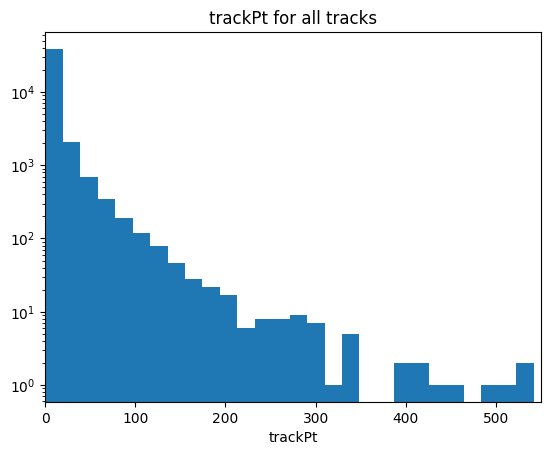

In [16]:
all_pts
plt.hist(all_pts, bins=1000)
plt.xlabel("trackPt")
plt.yscale('log')
plt.xlim(0, 550)
plt.title('trackPt for all tracks')

plt.show()

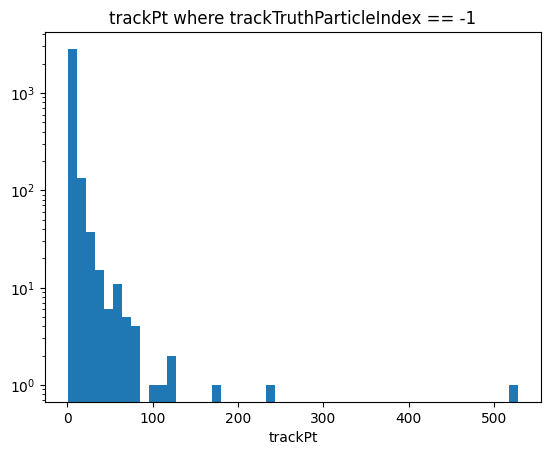

In [10]:
plt.hist(pt_with_index_minus_one, bins=50)
plt.xlabel("trackPt")
plt.yscale('log')
plt.xlim(0, 550)
plt.title('trackPt where trackTruthParticleIndex == -1')

plt.show()

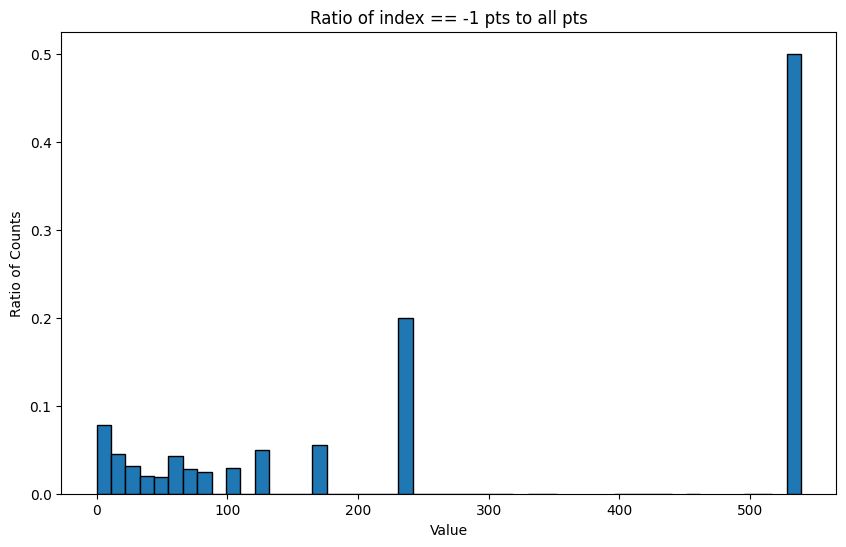

In [21]:
# Define common bins based on the overall data range
bin_edges = np.linspace(0, 
                        550, 51)  # 51 edges for 50 bins

# Calculate histograms without plotting
counts_pt_with_index_minus_one, _ = np.histogram(pt_with_index_minus_one, bins=bin_edges)
counts_all_pts, _ = np.histogram(all_pts, bins=bin_edges)

# Compute the ratio of counts; avoid division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.divide(counts_pt_with_index_minus_one, counts_all_pts)
    ratio[counts_all_pts == 0] = np.nan  # Set the ratio to NaN where all_pts has no counts

# Plot the ratio histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], ratio, width=np.diff(bin_edges), align='edge', edgecolor='black')
plt.title('Ratio of index == -1 pts to all pts')
plt.xlabel('Value')
plt.ylabel('Ratio of Counts')
plt.show()

In [ ]:
from particle import Particle
from collections import Counter
%matplotlib widget
names = []
for pdgid in pdg_ids_with_index_minus_one:
    names.append(Particle.from_pdgid(pdgid).name)
name_counts = Counter(names)

# Sort names by count in descending order
sorted_names = sorted(name_counts, key=name_counts.get, reverse=True)
sorted_counts = [name_counts[name] for name in sorted_names]

# Create the histogram
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_names, sorted_counts, hatch='/', log=True)  # Use log scale on y-axis

# Add checkered pattern to bars
for bar in bars:
    bar.set_hatch('//')  # Double slashes make the pattern denser

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
plt.hist(root_file['EventTree;1']['nTrack'].array(), bins=50)
plt.title("JZ4 Histogram of Lengths of Items in 'trackTruthParticleIndex' After Removing -1")
plt.xlabel("Length of Items")
plt.ylabel("Frequency")
plt.show()

In [ ]:
track_truth_particle_index = root_file['EventTree;1']["trackTruthParticleIndex"].array()

# Process the data: Remove all instances of -1 and calculate the lengths
lengths = [len(arr[arr == -1]) for arr in track_truth_particle_index]

# Create the histogram
plt.hist(lengths, bins='auto')
plt.title("JZ4 Histogram number of'trackTruthParticleIndex' == -1")
plt.xlabel("nTrack")
plt.ylabel("Frequency")
plt.show()

In [ ]:
track_truth_particle_index = root_file['EventTree;1']["trackTruthParticleIndex"].array()

# Process the data: Remove all instances of -1 and calculate the lengths
lengths = [len(arr) for arr in track_truth_particle_index]

# Create the histogram
plt.hist(lengths, bins=50)
plt.title("JZ4 Histogram of Lengths of Items in 'trackTruthParticleIndex'")
plt.xlabel("Length of Items")
plt.ylabel("Frequency")
plt.show()

In [ ]:
root_file['EventTree;1'].keys()

In [ ]:
%matplotlib widget

focal_index = 0

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-1000,1000)
#ax.set_ylim(-1000,0)
#ax.set_zlim(-6000,-3000)
ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
#ax.set_xlabel('X Axis (mm)')
#ax.set_ylabel('Y Axis (mm)')  # Assuming you meant to plot Z along the vertical in your original plotting order
#ax.set_zlabel('Z Axis (mm)')  # And Y on the third dimension
plt.tight_layout()
#plt.title(f"Dijet Track and Cells (Simulated)")
full_phi_list = [] 
trig = False
# Add tracks
for i in range(len(root_file["EventTree"]['trackPhi_EMB1'].array()[focal_index])):
    xl, yl, zl = [0], [0], [0]
    for loc, rPerp in fixed_r.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            full_phi_list.append(phi)
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
    for loc, z_loc in fixed_z.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            full_phi_list.append(phi)
            x, y, z = intersection_fixed_z(eta, phi, z_loc)
            xl.append(x)
            yl.append(y)
            zl.append(z)

    if len(xl)>0 and trig == False and False:
        print(i)
        ax.plot(xl, yl, zl, "--", label=f"{i} track", linewidth=10)
        print(xl, yl, zl)
        trig = True
    else:
        ax.plot(xl, yl, zl, linewidth=1)

eta_arr = geo_file['CellGeo']['cell_geo_eta'].array()
phi_arr = geo_file['CellGeo']['cell_geo_phi'].array()
rPerp_arr = geo_file['CellGeo']['cell_geo_rPerp'].array()
xl, yl, zl, el = [], [], [], []
cell_es_arr = root_file["EventTree"]['cluster_cell_E'].array()

# Add Cell Hits
for idx, cluster_ids in enumerate(root_file["EventTree"]['cluster_cell_ID'].array()[focal_index]):
    if True:
        for cell_idx, cell_id in enumerate(cluster_ids):
            index = ak.where(geo_file['CellGeo']['cell_geo_ID'].array() == cell_id)
            eta = eta_arr[index]
            phi = phi_arr[index]
            rPerp = rPerp_arr[index]
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
            el.append(cell_es_arr[focal_index][idx][cell_idx])
    print(idx)

# Remove the grid
ax.grid(False)
ax.set_axis_off()

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove the background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

sc= ax.scatter(xl, yl, zl, c=el, cmap='viridis', norm=LogNorm(), edgecolors='none', alpha=0.8, s=5)
#cbar2 = plt.colorbar(sc, ax=ax)
#cbar2.set_label('Cell E (GeV)')
#te = 0
#ax.scatter(xl[te], yl[te], zl[te], label=f"CELL ID {root_file['EventTree']['cluster_cell_ID'].array()[focal_index][0][te]}")
#ax.scatter(0, 0, 0, label='Origin')
ax.view_init(elev=30, azim=45)
#plt.legend()
plt.savefig("EvetImage2.png", dpi=800, pad_inches=0, transparent=True)

In [ ]:
%matplotlib widget

focal_index = 0

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-1000,1000)
#ax.set_ylim(-1000,0)
#ax.set_zlim(-6000,-3000)
ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
ax.set_xlabel('X Axis (mm)')
ax.set_ylabel('Y Axis (mm)')  # Assuming you meant to plot Z along the vertical in your original plotting order
ax.set_zlabel('Z Axis (mm)')  # And Y on the third dimension
plt.title(f"Dijet Track and Cells (Simulated)")
full_phi_list = [] 
trig = False
# Add tracks
for i in range(len(root_file["EventTree"]['trackPhi_EMB1'].array()[focal_index])):
    xl, yl, zl = [0], [0], [0]
    for loc, rPerp in fixed_r.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            full_phi_list.append(phi)
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
    for loc, z_loc in fixed_z.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            full_phi_list.append(phi)
            x, y, z = intersection_fixed_z(eta, phi, z_loc)
            xl.append(x)
            yl.append(y)
            zl.append(z)

    if len(xl)>0 and trig == False and False:
        print(i)
        ax.plot(xl, yl, zl, "--", label=f"{i} track", linewidth=10)
        print(xl, yl, zl)
        trig = True
    else:
        ax.plot(xl, yl, zl, linewidth=1)

eta_arr = geo_file['CellGeo']['cell_geo_eta'].array()
phi_arr = geo_file['CellGeo']['cell_geo_phi'].array()
rPerp_arr = geo_file['CellGeo']['cell_geo_rPerp'].array()
xl, yl, zl, el = [], [], [], []
cell_es_arr = root_file["EventTree"]['cluster_cell_E'].array()

# Add Cell Hits
for idx, cluster_ids in enumerate(root_file["EventTree"]['cluster_cell_ID'].array()[focal_index]):
    if True:
        for cell_idx, cell_id in enumerate(cluster_ids):
            index = ak.where(geo_file['CellGeo']['cell_geo_ID'].array() == cell_id)
            eta = eta_arr[index]
            phi = phi_arr[index]
            rPerp = rPerp_arr[index]
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
            el.append(cell_es_arr[focal_index][idx][cell_idx])
    print(idx)

# Remove the grid
#ax.grid(False)
#ax.set_axis_off()

# Remove the tick labels but keep the grid and axes
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Remove axes
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])

# Remove the background
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

sc= ax.scatter(xl, yl, zl, c=el, cmap='viridis', norm=LogNorm(), edgecolors='none', alpha=0.8, s=5)
#cbar2 = plt.colorbar(sc, ax=ax)
#cbar2.set_label('Cell E (GeV)')
#te = 0
#ax.scatter(xl[te], yl[te], zl[te], label=f"CELL ID {root_file['EventTree']['cluster_cell_ID'].array()[focal_index][0][te]}")
#ax.scatter(0, 0, 0, label='Origin')
ax.view_init(elev=30, azim=45)
#plt.legend()
plt.tight_layout()

plt.savefig("EvetImage2.png", dpi=800, transparent=True)